In [47]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np


In [48]:
data = pd.read_csv('C:/Users/xuziq/Desktop/correlation/augmented_rgb.csv',encoding='utf-8')

In [49]:
data

,names,R,G,B,Output
0,A,209,101,95,8
1,A1,210,103,97,8
2,A2,206,101,96,8
3,A3,207,104,97,8
4,A4,209,100,95,8
...,...,...,...,...,...
121,Pippa,162,26,40,40
122,Rory,147,11,29,42
123,Rossi,157,44,54,50
124,Shifty,143,25,41,50


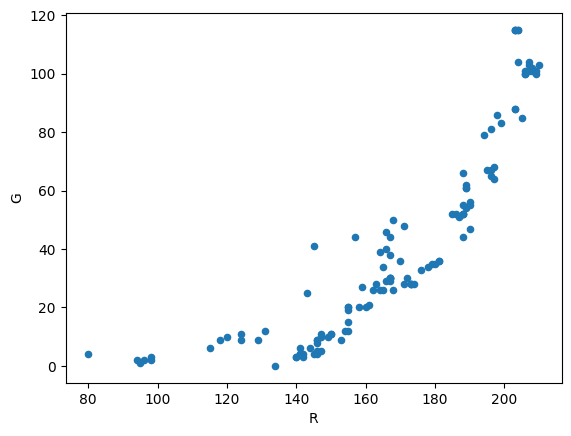

In [50]:
data.plot(kind='scatter', x='R', y='G')
plt.show()

In [51]:
x = data['R']
y = data['G']
z = data['B']

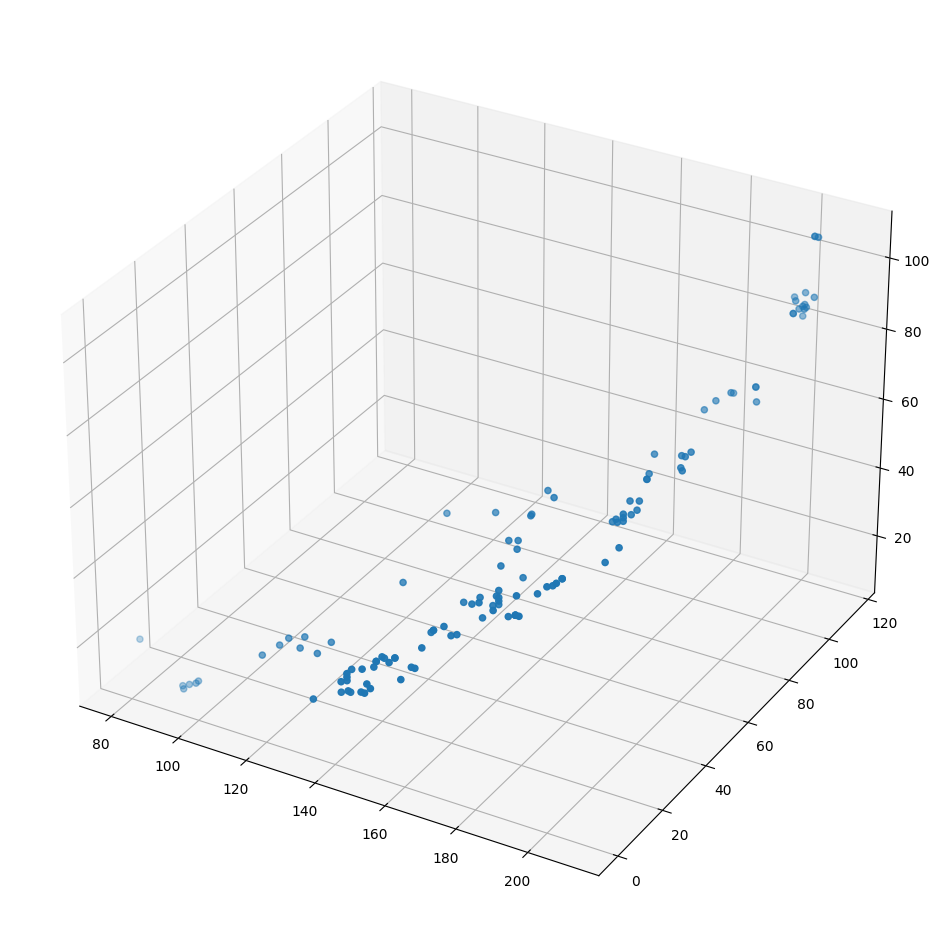

In [52]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x,y,z)
plt.show()

In [53]:
data.corr()

C:\Users\xuziq\AppData\Local\Temp\ipykernel_11560\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R,G,B,Output
R,1.000000,0.870617,0.884554,-0.893480
G,0.870617,1.000000,0.992990,-0.889080
B,0.884554,0.992990,1.000000,-0.876097
Output,-0.893480,-0.889080,-0.876097,1.000000


In [54]:
R = pd.DataFrame(data['R'])
G = pd.DataFrame(data['G'])
B = pd.DataFrame(data['B'])
Output = pd.DataFrame(data['Output'])
p = np.genfromtxt('C:/Users/xuziq/Desktop/correlation/exp.csv', delimiter=',', usecols=(1,2,3),skip_header=1)
Output = np.genfromtxt('C:/Users/xuziq/Desktop/correlation/exp.csv', delimiter=',', usecols=(4),skip_header=1)
Output


array([ 8.,  8.,  8.,  8.,  8., 40., 40., 40., 40., 40., 44., 44., 44.,
       44., 44.,  7.,  7.,  7.,  7.,  7., 60., 60., 60., 60., 60., 35.,
       35., 35., 35., 35., 45., 45., 45., 45., 45., 46., 46., 46., 46.,
       46., 15., 15., 15., 15., 15., 55., 55., 55., 55., 55., 40., 40.,
       40., 40., 40.,  5.,  5.,  5.,  5.,  5., 51., 51., 51., 51., 51.,
       19., 19., 19., 19., 19., 36., 36., 36., 36., 36., 15., 15., 15.,
       15., 15., 31., 31., 31., 31., 31., 32., 32., 32., 32., 32., 19.,
       19., 19., 39., 39., 39., 54., 54., 54., 49., 49., 49., 15.,  6.,
        7., 15., 15.,  6.,  6.,  7.,  7., 43., 43., 43.,  6.,  5., 25.,
        5., 45., 56., 40., 40., 42., 50., 50., 36.])

In [55]:
lm = linear_model.LinearRegression()
model = lm.fit(p,Output)

In [56]:
model.coef_

array([-0.35581153, -0.86326093,  0.92687331])

In [57]:
model.score(p,Output)

0.8718846887677187

In [62]:
X = ([[201,89,79],[196,80,71],[209, 106, 95], [205, 99, 88], [179,35,45],[173,32,42]])
#n11,n12,n21, n22, n31,n32

X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X,Y], axis=1, keys=['R', 'Output'])
df
#6,6,5,5,25,25

R              Output
     0    1   2          0
0  201   89  79   5.883714
1  196   80  71   8.017133
2  209  106  95   3.191758
3  205   99  88   4.169718
4  179   35  45  28.813965
5  173   32  42  30.757997